In [2]:
!pip install dlib

In [3]:
import numpy as np
import cv2
import dlib
import os
from imutils import face_utils
from google.colab import drive
from google.colab.patches import cv2_imshow

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = '/content/drive/MyDrive/test_openCV'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['image_100.jpg',
 'image_500.jpg',
 'image_480.jpg',
 'image_460.jpg',
 'image_420.jpg',
 'image_340.jpg',
 'image_380.jpg',
 'image_400.jpg',
 'image_360.jpg',
 'image_440.jpg',
 'image_320.jpg',
 'image_300.jpg',
 'image_280.jpg',
 'image_120.jpg',
 'image_240.jpg',
 'image_260.jpg',
 'image_220.jpg',
 'image_160.jpg',
 'image_200.jpg',
 'image_140.jpg',
 'image_180.jpg',
 'image_1020.jpg',
 'image_1040.jpg',
 'image_1060.jpg',
 'image_960.jpg',
 'image_940.jpg',
 'image_980.jpg',
 'image_1000.jpg',
 'image_920.jpg',
 'image_900.jpg',
 'image_880.jpg',
 'image_860.jpg',
 'image_740.jpg',
 'image_800.jpg',
 'image_820.jpg',
 'image_780.jpg',
 'image_760.jpg',
 'image_840.jpg',
 'image_720.jpg',
 'image_700.jpg',
 'image_680.jpg',
 'image_660.jpg',
 'image_600.jpg',
 'image_520.jpg',
 'image_620.jpg',
 'image_560.jpg',
 'image_540.jpg',
 'image_640.jpg',
 'image_580.jpg',
 'image_1300.jpg',
 'image_1280.jpg',
 'image_1260.jpg',
 'image_1220.jpg',
 'image_1140.jpg',
 'image_1200.jpg',


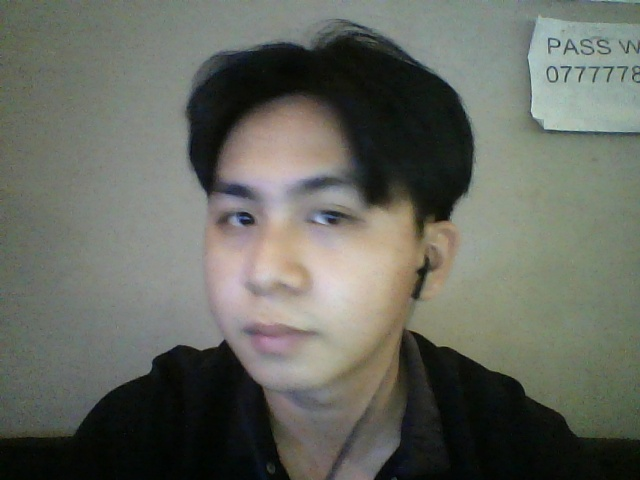

In [9]:
im=cv2.imread(path+"/image_580.jpg")
cv2_imshow(im)

(1, 1, 200, 7)
[0.         1.         0.99980384 0.31653085 0.19906595 0.6434519
 0.79687023]
[0.31653085 0.19906595 0.6434519  0.79687023]
202 95 411 382


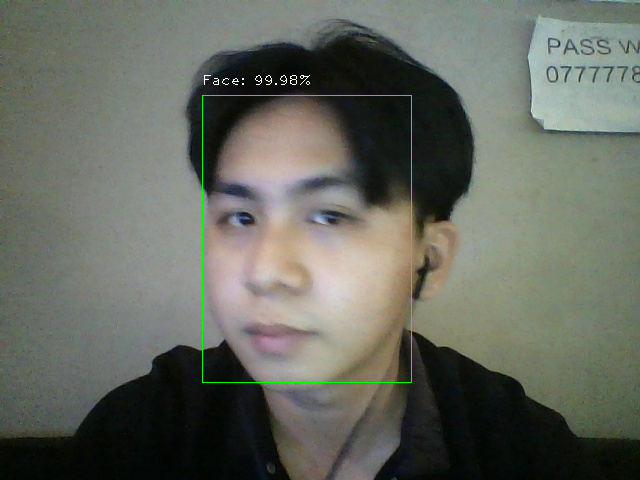

In [13]:
# Tải mô hình đã được huấn luyện từ trước
net = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/test_openCV/models/deploy.prototxt.txt.prototxt', '/content/drive/MyDrive/test_openCV/models/res10_300x300_ssd_iter_140000_fp16.caffemodel')

# Chuẩn bị dữ liệu đầu vào
# img: Đây là ảnh đầu vào mà bạn muốn nhận dạng khuôn mặt. Trong trường hợp của bạn, bạn đã đọc ảnh từ tệp "face.png".
# 1.0: Đây là tỷ lệ co giãn cho ảnh. Trong trường hợp này, ảnh sẽ không bị co giãn hoặc mở rộng, và giữ nguyên kích thước ban đầu.
# (300, 300): Đây là kích thước mà mô hình yêu cầu cho ảnh đầu vào. Mô hình mà bạn đang sử dụng mong muốn ảnh có kích thước 300x300 pixel. Do đó, bạn co giãn hoặc cắt ảnh đầu vào thành kích thước này.
# (104, 177, 123): Đây là giá trị trung bình màu sắc được trừ đi từ mỗi pixel của ảnh. Điều này thường được sử dụng để chuẩn hóa dữ liệu đầu vào. Trong trường hợp này, các giá trị này thường được lấy từ dữ liệu huấn luyện của mô hình.
# swapRB=False: Đây là một cờ để xác định xem có cần hoán đổi các kênh màu đỏ và xanh (Red-Blue) trong ảnh hay không. Trong trường hợp này, bạn đã đặt nó thành False, tức là không hoán đổi kênh mà
blob = cv2.dnn.blobFromImage(im, 1.0, (300, 300), (104, 177, 123), swapRB=False)

# Đặt dữ liệu đầu vào cho mạng
net.setInput(blob)

# Chạy mạng để phát hiện khuôn mặt
faces = net.forward()

# Lấy kích thước của ảnh đầu vào
h = im.shape[0]
w = im.shape[1]

# In thông tin
print(faces.shape)
print(faces[0, 0, 0, ])

# Duyệt từng khuôn mặt đã được phát hiện
for i in range(0, faces.shape[2]):
    confidence = faces[0,0,i,2]
    # Kiểm tra nếu mặt có độ tin cậy là 0.5
    if confidence>0.5:
        # Trích xuất tọa độ
        print(faces[0, 0, i, 3:7])
        startx = int(faces[0, 0, i, 3]*w)
        starty = int(faces[0, 0, i, 4]*h)
        endx = int(faces[0, 0, i, 5]*w)
        endy = int(faces[0, 0, i, 6]*h)
        print(startx, starty, endx, endy)

        # Vẽ hình chữ nhật xung quanh khuôn mặt đã phát hiện
        cv2.rectangle(im, (startx, starty), (endx, endy), (0, 255, 0),)

        # Hiển thị độ tin cậy
        text = 'Face: {:.2f}%'.format(confidence*100);
        cv2.putText(im, text, (startx, starty-10), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255),)

# Hiển thị ảnh gốc
cv2_imshow(im)